In [1]:
!git clone https://github.com/cmonkl/Product-image-generation-from-text-description.git

Cloning into 'Product-image-generation-from-text-description'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 188 (delta 86), reused 141 (delta 45), pack-reused 0
Receiving objects: 100% (188/188), 8.90 MiB | 2.59 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files

In [4]:
!pip install -q kaggle

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp /content/kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-dataset -p '/content'

100% 23.1G/23.1G [10:48<00:00, 41.9MB/s]
100% 23.1G/23.1G [10:48<00:00, 38.2MB/s]


In [9]:
!unzip '/content/fashion-product-images-dataset.zip'
!rm '/content/fashion-product-images-dataset.zip'


Streaming output truncated to the last 5000 lines.
  inflating: fashion-dataset/styles/58128.json  
  inflating: fashion-dataset/styles/58129.json  
  inflating: fashion-dataset/styles/5813.json  
  inflating: fashion-dataset/styles/58131.json  
  inflating: fashion-dataset/styles/58132.json  
  inflating: fashion-dataset/styles/58133.json  
  inflating: fashion-dataset/styles/58135.json  
  inflating: fashion-dataset/styles/58136.json  
  inflating: fashion-dataset/styles/58137.json  
  inflating: fashion-dataset/styles/58138.json  
  inflating: fashion-dataset/styles/58139.json  
  inflating: fashion-dataset/styles/5814.json  
  inflating: fashion-dataset/styles/58140.json  
  inflating: fashion-dataset/styles/58141.json  
  inflating: fashion-dataset/styles/58143.json  
  inflating: fashion-dataset/styles/58144.json  
  inflating: fashion-dataset/styles/58145.json  
  inflating: fashion-dataset/styles/58146.json  
  inflating: fashion-dataset/styles/58147.json  
  inflating: fashion

In [10]:
%cd Product-image-generation-from-text-description


/content/Product-image-generation-from-text-description


In [11]:
!pip install -r /content/Product-image-generation-from-text-description/docker/requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.1/171.1 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.1/244.1 kB 25.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 691.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.

In [12]:
!pip install --upgrade wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=ffa2755c961a45937803ef4a8a24353ca18d1c5c50f437f0ec91861d8af3eb68
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [13]:
#4cd70961a0ea2f86205b45153ee1bc8b75f037fc

import wandb
wandb.login()

run = wandb.init(project='StyleGAN2',
                    group='finetune', #resume='must',
                    job_type='train')


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: marwan-kawadri-2000. Use `wandb login --relogin` to force relogin


In [14]:
#Install the required libraries
!pip install -qq accelerate tensorboard ftfy
!pip install -qq -U transformers
!pip install -qq -U diffusers
!pip install -qq bitsandbytes
!pip install gradio


import argparse
import itertools
import math
import os
import random

import numpy as np
import torch
import torch.nn.functional as F
import torch.utils.checkpoint
from torch.utils.data import Dataset

import PIL
from accelerate import Accelerator
from accelerate.logging import get_logger
from accelerate.utils import set_seed
from diffusers import AutoencoderKL, DDPMScheduler, PNDMScheduler, StableDiffusionPipeline, UNet2DConditionModel
from diffusers.optimization import get_scheduler
from diffusers.pipelines.stable_diffusion import StableDiffusionSafetyChecker
from PIL import Image
from torchvision import transforms
from tqdm.auto import tqdm
from transformers import CLIPFeatureExtractor, CLIPTextModel, CLIPTokenizer


#@title Settings for your newly created concept

concept_name = "background"

#`initializer_token` is a word that can summarise what your
# new concept is, to be used as a starting point

initializer_token = "background"

#`what_to_teach`: what is it that you are teaching? `object` enables you to teach the model a new object to be used,
#`style` allows you to teach the model a new style one can use.

what_to_teach = "style"

#`placeholder_token` is the token you are going to use to represent your new concept (so when you prompt the model,
# you will say "A `` in an amusement park").
# We use angle brackets to differentiate a token from other words/tokens, to avoid collision.

placeholder_token = f'<{concept_name}>'


imagenet_style_templates_small = [
    "a background in the style of {}",
    "a wall in the style of {}",
    "a wallpaper in the style of {}",
    "a backdrop in the style of {}"
]


#@title Setup the dataset
class TextualInversionDataset(Dataset):
    def __init__(
        self,
        data_root,
        tokenizer,
        learnable_property="style",  # [object, style]
        size=512,
        repeats=100,
        interpolation="bicubic",
        flip_p=0.5,
        set="train",
        placeholder_token="*",
        center_crop=False,
    ):

        self.data_root = data_root
        self.tokenizer = tokenizer
        self.learnable_property = learnable_property
        self.size = size
        self.placeholder_token = placeholder_token
        self.center_crop = center_crop
        self.flip_p = flip_p

        self.image_paths = [os.path.join(self.data_root, file_path) for file_path in os.listdir(self.data_root)]

        self.num_images = len(self.image_paths)
        self._length = self.num_images

        if set == "train":
            self._length = self.num_images * repeats

        self.interpolation = {
            "linear": PIL.Image.LINEAR,
            "bilinear": PIL.Image.BILINEAR,
            "bicubic": PIL.Image.BICUBIC,
            "lanczos": PIL.Image.LANCZOS,
        }[interpolation]

        self.templates = imagenet_style_templates_small if learnable_property == "style" else imagenet_templates_small
        self.flip_transform = transforms.RandomHorizontalFlip(p=self.flip_p)

    def __len__(self):
        return self._length

    def __getitem__(self, i):
        example = {}
        image = Image.open(self.image_paths[i % self.num_images])

        if not image.mode == "RGB":
            image = image.convert("RGB")

        placeholder_string = self.placeholder_token
        text = random.choice(self.templates).format(placeholder_string)

        example["input_ids"] = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.tokenizer.model_max_length,
            return_tensors="pt",
        ).input_ids[0]

        # default to score-sde preprocessing
        img = np.array(image).astype(np.uint8)

        if self.center_crop:
            crop = min(img.shape[0], img.shape[1])
            h, w, = (
                img.shape[0],
                img.shape[1],
            )
            img = img[(h - crop) // 2 : (h + crop) // 2, (w - crop) // 2 : (w + crop) // 2]

        image = Image.fromarray(img)
        image = image.resize((self.size, self.size), resample=self.interpolation)

        image = self.flip_transform(image)
        image = np.array(image).astype(np.uint8)
        image = (image / 127.5 - 1.0).astype(np.float32)

        example["pixel_values"] = torch.from_numpy(image).permute(2, 0, 1)
        return example


pretrained_model_name_or_path = "CompVis/stable-diffusion-v1-4"


tokenizer = CLIPTokenizer.from_pretrained(pretrained_model_name_or_path, subfolder="tokenizer")


# Add the placeholder token in tokenizer
num_added_tokens = tokenizer.add_tokens(placeholder_token)
if num_added_tokens == 0:
    raise ValueError(
        f"The tokenizer already contains the token {placeholder_token}. Please pass a different"
        " `placeholder_token` that is not already in the tokenizer."
    )


# Convert the initializer_token, placeholder_token to ids
token_ids = tokenizer.encode(initializer_token, add_special_tokens=False)
# Check if initializer_token is a single token or a sequence of tokens
if len(token_ids) > 1:
    raise ValueError("The initializer token must be a single token.")

initializer_token_id = token_ids[0]
placeholder_token_id = tokenizer.convert_tokens_to_ids(placeholder_token)


# Load models and create wrapper for stable diffusion
text_encoder = CLIPTextModel.from_pretrained(
    pretrained_model_name_or_path, subfolder="text_encoder",

)
vae = AutoencoderKL.from_pretrained(
    pretrained_model_name_or_path, subfolder="vae",

)
unet = UNet2DConditionModel.from_pretrained(
    pretrained_model_name_or_path, subfolder="unet",

)


text_encoder.resize_token_embeddings(len(tokenizer))

token_embeds = text_encoder.get_input_embeddings().weight.data
token_embeds[placeholder_token_id] = token_embeds[initializer_token_id]


def freeze_params(params):
    for param in params:
        param.requires_grad = False

# Freeze vae and unet
freeze_params(vae.parameters())
freeze_params(unet.parameters())
# Freeze all parameters except for the token embeddings in text encoder
params_to_freeze = itertools.chain(
    text_encoder.text_model.encoder.parameters(),
    text_encoder.text_model.final_layer_norm.parameters(),
    text_encoder.text_model.embeddings.position_embedding.parameters(),
)
freeze_params(params_to_freeze)



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 52.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.4 MB/s eta 0:00:00
   

In [16]:
train_dataset = TextualInversionDataset(
      data_root='/content/Product-image-generation-from-text-description/fashion-dataset/fashion-dataset/images',
      tokenizer=tokenizer,
      size=512,
      placeholder_token=placeholder_token,
      repeats=100,
      learnable_property=what_to_teach, #Option selected above between object and style
      center_crop=False,
      set="train",
)

def create_dataloader(train_batch_size=25):
    return torch.utils.data.DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)


noise_scheduler = DDPMScheduler(
    beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)


hyperparameters = {
    "learning_rate": 5e-04,
    "scale_lr": True,
    "max_train_steps": 300,
    "train_batch_size": 1,
    "gradient_accumulation_steps": 1,
    "seed": 42,
    "output_dir": f'/content/drive/MyDrive/concepts/{concept_name}-concept',
}


def training_function(text_encoder, vae, unet):
    # logger = get_logger(__name__)

    train_batch_size = hyperparameters["train_batch_size"]
    gradient_accumulation_steps = hyperparameters["gradient_accumulation_steps"]
    learning_rate = hyperparameters["learning_rate"]
    max_train_steps = hyperparameters["max_train_steps"]
    output_dir = hyperparameters["output_dir"]

    accelerator = Accelerator(
        gradient_accumulation_steps=gradient_accumulation_steps,
        # distributed_type='MULTI_GPU'
        # distribute_type: Accelerate.DistributedType.MULTI_GPU
        # fp16=True,
        # gpu=True,
    )

    train_dataloader = create_dataloader(train_batch_size)

    if hyperparameters["scale_lr"]:
        learning_rate = (
            learning_rate * gradient_accumulation_steps * train_batch_size * accelerator.num_processes
        )

    # Initialize the optimizer
    optimizer = torch.optim.AdamW(
        text_encoder.get_input_embeddings().parameters(),  # only optimize the embeddings
        lr=learning_rate,
    )


    text_encoder, optimizer, train_dataloader = accelerator.prepare(
        text_encoder, optimizer, train_dataloader
    )

    # Move vae and unet to device
    vae.to(accelerator.device)
    unet.to(accelerator.device)

    # Keep vae and unet in eval model as we don't train these
    vae.eval()
    unet.eval()

    # We need to recalculate our total training steps as the size of the training dataloader may have changed.
    num_update_steps_per_epoch = math.ceil(len(train_dataloader) / gradient_accumulation_steps)
    num_train_epochs = math.ceil(max_train_steps / num_update_steps_per_epoch)

    # Train!
    total_batch_size = train_batch_size * accelerator.num_processes * gradient_accumulation_steps

    # logger.info("***** Running training *****")
    # logger.info(f"  Num examples = {len(train_dataset)}")
    # logger.info(f"  Instantaneous batch size per device = {train_batch_size}")
    # logger.info(f"  Total train batch size (w. parallel, distributed & accumulation) = {total_batch_size}")
    # logger.info(f"  Gradient Accumulation steps = {gradient_accumulation_steps}")
    # logger.info(f"  Total optimization steps = {max_train_steps}")
    # Only show the progress bar once on each machine.
    progress_bar = tqdm(range(max_train_steps), disable=not accelerator.is_local_main_process)
    progress_bar.set_description("Steps")
    global_step = 0

    for epoch in range(num_train_epochs):
        text_encoder.train()
        for step, batch in enumerate(train_dataloader):
            with accelerator.accumulate(text_encoder):
                # Convert images to latent space
                latents = vae.encode(batch["pixel_values"]).latent_dist.sample().detach()
                latents = latents * 0.18215

                # Sample noise that we'll add to the latents
                noise = torch.randn(latents.shape).to(latents.device)
                bsz = latents.shape[0]
                # Sample a random timestep for each image
                timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bsz,), device=latents.device).long()

                # Add noise to the latents according to the noise magnitude at each timestep
                # (this is the forward diffusion process)
                noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

                # Get the text embedding for conditioning
                encoder_hidden_states = text_encoder(batch["input_ids"])[0]

                # Predict the noise residual
                noise_pred = unet(noisy_latents, timesteps, encoder_hidden_states).sample

                loss = F.mse_loss(noise_pred, noise, reduction="none").mean([1, 2, 3]).mean()
                accelerator.backward(loss)

                # Zero out the gradients for all token embeddings except the newly added
                # embeddings for the concept, as we only want to optimize the concept embeddings
                if accelerator.num_processes > 1:
                    grads = text_encoder.module.get_input_embeddings().weight.grad
                else:
                    grads = text_encoder.get_input_embeddings().weight.grad
                # Get the index for tokens that we want to zero the grads for
                index_grads_to_zero = torch.arange(len(tokenizer)) != placeholder_token_id
                grads.data[index_grads_to_zero, :] = grads.data[index_grads_to_zero, :].fill_(0)

                optimizer.step()
                optimizer.zero_grad()

            # Checks if the accelerator has performed an optimization step behind the scenes
            if accelerator.sync_gradients:
                progress_bar.update(1)
                global_step += 1

            logs = {"loss": loss.detach().item()}
            progress_bar.set_postfix(**logs)

            if global_step >= max_train_steps:
                break

        accelerator.wait_for_everyone()


    # Create the pipeline using using the trained modules and save it.
    if accelerator.is_main_process:
        pipeline = StableDiffusionPipeline(
            text_encoder=accelerator.unwrap_model(text_encoder),
            vae=vae,
            unet=unet,
            tokenizer=tokenizer,
            scheduler=PNDMScheduler(
                beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", skip_prk_steps=True
            ),
            safety_checker=StableDiffusionSafetyChecker.from_pretrained("CompVis/stable-diffusion-safety-checker"),
            feature_extractor=CLIPFeatureExtractor.from_pretrained("openai/clip-vit-base-patch32"),
        )
        pipeline.save_pretrained(output_dir)
        # Also save the newly trained embeddings
        learned_embeds = accelerator.unwrap_model(text_encoder).get_input_embeddings().weight[placeholder_token_id]
        learned_embeds_dict = {placeholder_token: learned_embeds.detach()}
        torch.save(learned_embeds_dict, os.path.join(output_dir, "learned_embeds.bin"))





In [17]:
import accelerate

accelerate.notebook_launcher(training_function, args=(text_encoder, vae, unet), num_processes=1)

!pip install GPUtil
from GPUtil import showUtilization as gpu_usage


torch.cuda.empty_cache()
gpu_usage()

#@title Set up the pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    hyperparameters["output_dir"],
    # "downloaded_embedding",
    torch_dtype=torch.float16,
    # device_map="auto",
).to("cuda")

## Instantiate helper function
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid





Launching training on one GPU.


  0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:135: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:131: FutureWarning: The configuration file of this scheduler: PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.17.1",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 0,
  "trained_betas": null
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update the config accordingly as leaving `steps_offset` might led to incorrect results in future versions. If you have downloaded this checkpoint from the Hu

  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=4b8b129c8bca66302ad2fad62d94fa72e15d42e259e4a5290232f7dfa975fb24
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built GPUtil
| ID | GPU | MEM |
------------------
|  0 |  0% | 40% |


/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

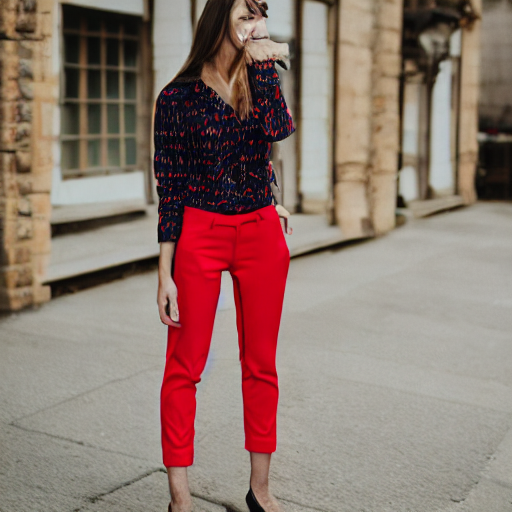

In [34]:
prompt = f"Red Pants{placeholder_token}"

num_samples = 1
num_rows = 1

# prevent safety checking
def dummy(images, **kwargs):
    return images, [False] * len(images)
pipe.safety_checker = dummy

all_images = []
for _ in range(num_rows):
    images = pipe([prompt] * num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

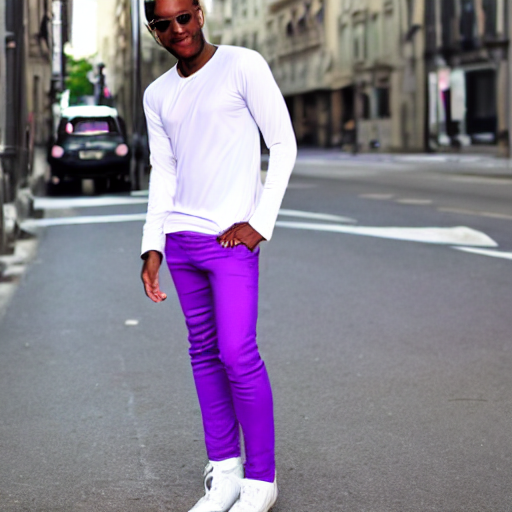

In [35]:
prompt = f"purple t-shirt with white pants  {placeholder_token}"

num_samples = 1
num_rows = 1

# prevent safety checking
def dummy(images, **kwargs):
    return images, [False] * len(images)
pipe.safety_checker = dummy

all_images = []
for _ in range(num_rows):
    images = pipe([prompt] * num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

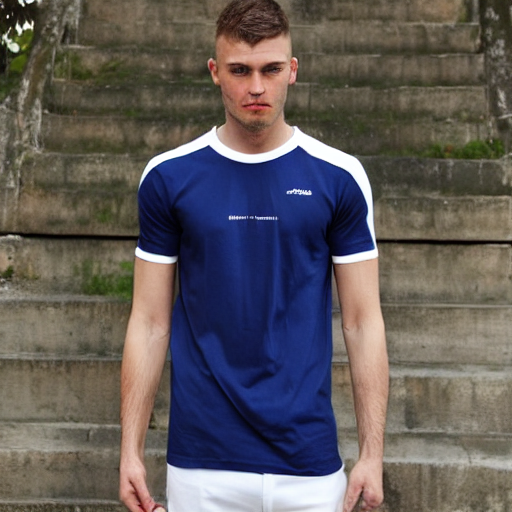

In [36]:
prompt = f"White T-shirt {placeholder_token}"

num_samples = 1
num_rows = 1

# prevent safety checking
def dummy(images, **kwargs):
    return images, [False] * len(images)
pipe.safety_checker = dummy

all_images = []
for _ in range(num_rows):
    images = pipe([prompt] * num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

In [21]:
!pip install -q transformers
!pip install torchmetrics[image]

import torch
import pandas as pd
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader, Subset
from transformers import CLIPTokenizer
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.9 MB/s eta 0:00:00


In [22]:
import sys

project_path = '/content/Product-image-generation-from-text-description'
sys.path.insert(0, project_path)

import os
from torch.utils.data import Dataset
from PIL import Image


class CustomTensorDataset(Dataset):
    def __init__(self, descriptions, tokenizer, path, transform_images=None):
        self.descriptions = descriptions

        self.links = {}
        for file in os.listdir(path):
            self.links[int(file.split('.')[0])] = path + '/' + file

        self.tokenizer = tokenizer
        self.transform_images = transform_images

    def __getitem__(self, index):

        text = self.descriptions.iloc[index]['description']
        idx = self.descriptions.iloc[index]['id']
        tokenized_text = self.tokenizer(text, padding="max_length", max_length=self.tokenizer.model_max_length, truncation=True,
                                   return_tensors="pt")

        image = Image.open(self.links[idx])
        if self.transform_images:
            image = self.transform_images(image)

        return tokenized_text, image

    def __len__(self):
        return len(self.links)

In [23]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


from diffusers import AutoencoderKL
from diffusers import UNet2DConditionModel, LMSDiscreteScheduler, DDPMScheduler
from transformers import CLIPTextModel, CLIPTokenizer
import torch

dtype = torch.float32
vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae", torch_dtype=dtype).to(device)
unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="unet", torch_dtype=dtype).to(device)
text_encoder = CLIPTextModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="text_encoder", torch_dtype=dtype).to(device)
tokenizer = CLIPTokenizer.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="tokenizer")
noise_scheduler = DDPMScheduler(
        beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)

vae.requires_grad_(False)
text_encoder.requires_grad_(False)

CLIPTextModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 768)
      (position_embedding): Embedding(77, 768)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e

In [24]:
import os
import pandas as pd


project_path = '/content/Product-image-generation-from-text-description'

path_to_descriptions = os.path.join('/content/Product-image-generation-from-text-description/data/descriptions.json')
descriptions = pd.read_json(path_to_descriptions, orient='records')

In [25]:
RESOLUTION = 512

data_transformation_images = transforms.Compose([
            transforms.Resize((RESOLUTION, RESOLUTION)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, ), (0.5, ))
        ])

path = '/content/Product-image-generation-from-text-description/fashion-dataset/fashion-dataset/images'
batch_size = 6

dataset = CustomTensorDataset(descriptions, tokenizer, path, transform_images=data_transformation_images)

In [26]:
np.random.seed(42)
indices = np.arange(len(descriptions))
indices_train, indices_test = train_test_split(indices, test_size=0.006, random_state=42)

In [27]:
train_dataset = Subset(dataset, indices_train)
test_dataset = Subset(dataset, indices_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [28]:
ids = [3, 4, 7]
text_prompts = [prompt + " in style of online shop isolated on white background" for prompt in descriptions.iloc[[3, 4, 7], :]['description'].values]
print(text_prompts)

['Men Black Dial Chronograph Watch FS Winter Casual Accessories in style of online shop isolated on white background', 'Silver Ring Fall Casual in style of online shop isolated on white background', 'Women Yacho Jhuti Pink Belt Winter Casual Accessories in style of online shop isolated on white background']


In [29]:
from tqdm import tqdm

def generate_images(text_prompts, vae, unet, noise_scheduler, text_encoder, tokenizer, im_height=512, im_width=512):
    noise_scheduler.set_timesteps(70)
    text = [tokenizer(text_prmt, padding="max_length",
                                max_length=tokenizer.model_max_length, truncation=True,
                                return_tensors="pt")["input_ids"] for text_prmt in text_prompts]
    text = torch.cat(text)
    batch_size = text.shape[0]

    with torch.no_grad():
        text_embeddings = text_encoder(text.to(device))[0].to(dtype=dtype)#.half()

    latents = torch.randn((batch_size, unet.in_channels, im_height // 8, im_width // 8))
    latents = latents.to(device).to(dtype=dtype)#.half() #* noise_scheduler.init_noise_sigma
    latents = latents * vae.config.scaling_factor

    for t in tqdm(noise_scheduler.timesteps):
        latent_model_input = noise_scheduler.scale_model_input(latents, t)

        # predict the noise residual
        with torch.no_grad():
            noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

        # compute the previous noisy sample x_t -> x_t-1
        latents = noise_scheduler.step(noise_pred, t, latents).prev_sample

    latents = 1 / vae.config.scaling_factor * latents

    with torch.no_grad():
        images = vae.decode(latents).sample

    images = (images / 2 + 0.5).clamp(0, 1)
    images = images.detach().cpu().permute(0, 2, 3, 1).numpy()
    return images

In [30]:
from tqdm import tqdm
from torchmetrics.image.fid import FrechetInceptionDistance
from torchmetrics.image.inception import InceptionScore
from PIL import Image


def test(vae, unet, noise_scheduler, text_encoder, dataloader,num_inference_steps, device, logger, height=512, width=512):

    unet.eval()
    vae.eval()
    text_encoder.eval()
    noise_scheduler.set_timesteps(num_inference_steps, device=device)

    num_images_to_log = 10
    num_iters = (num_images_to_log / dataloader.batch_size) + 1


    # specifying metric
    fid = FrechetInceptionDistance(feature=64)
    metric_fid = 0.0
    inception_score = InceptionScore(feature=64)
    metric_inception = 0.0
    for idx, batch_data in tqdm(enumerate(dataloader)):
        text, images = batch_data
        images = images.to(device)
        with torch.no_grad():
            text_embeddings = text_encoder(text["input_ids"].squeeze(1).to(device))[0]
        batch_size = images.shape[0]

        latents = torch.randn((batch_size, unet.in_channels, height // 8, width // 8))
        latents = latents * vae.config.scaling_factor
        latents = latents.to(device)

        for t in noise_scheduler.timesteps:
            latent_model_input = noise_scheduler.scale_model_input(latents, t)

            # predict the noise residual
            with torch.no_grad():
                with torch.autocast(device_type='cuda', dtype=torch.float16, enabled=True):
                    noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

            # compute the previous noisy sample x_t -> x_t-1
            latents = noise_scheduler.step(noise_pred, t, latents).prev_sample

        latents = 1 / vae.config.scaling_factor * latents

        with torch.no_grad():
            with torch.autocast(device_type='cuda', dtype=torch.float16, enabled=True):
                pred_images = vae.decode(latents).sample

        if idx < num_iters:
            images_pred = (pred_images / 2 + 0.5).clamp(0, 1)
            images_pred = images_pred.cpu().permute(0, 2, 3, 1).float().numpy()
            true_images = (images / 2 + 0.5).clamp(0, 1).cpu().permute(0, 2, 3, 1).float().numpy()
            image_array = [(true_images[i] * 255).astype(np.uint8) for i in range(true_images.shape[0])]
            images_pred = [(images_pred[i] * 255).astype(np.uint8) for i in range(images_pred.shape[0])]

            lbl_idx = idx * dataloader.batch_size
            indices = dataloader.dataset.indices
            labels = [dataloader.dataset.dataset.descriptions.iloc[indices[lbl_idx + i]]['description'] for i in range(true_images.shape[0])]

            true_images = [Image.fromarray(image) for image in image_array]
            images_pred = [Image.fromarray(image) for image in images_pred]
            logger.log({"true_images": [wandb.Image(image, caption=labels[i]) for i, image in enumerate(true_images)],
                        "pred_images": [wandb.Image(image, caption=labels[i]) for i, image in enumerate(images_pred)]})
        # compute metrics
        # FID
        fid.update(images.type('torch.ByteTensor'), real=True)
        fid.update(pred_images.type('torch.ByteTensor'), real=False)
        metric_fid += fid.compute().item()
        # Inception Score
        inception_score.update(pred_images.type('torch.ByteTensor'))
        metric_inception += inception_score.compute()[0].item()

    return metric_fid/ len(dataloader), metric_inception / len(dataloader)


In [31]:
fid, inception_score = test(vae, unet, noise_scheduler, text_encoder, test_loader, 50, device, wandb)
print(f"FID: {fid}, Inception Score: {inception_score}")

Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:01<00:00, 50.9MB/s]
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
0it [00:00, ?it/s]<ipython-input-30-6e7185eab257>:30: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  latents = torch.randn((batch_size, unet.in_channels, height // 8, width // 8))
45it [19:05, 25.45s/it]

FID: 2.3733498454093933, Inception Score: 1.0047274589538575


In [32]:
inception_score


1.0047274589538575

In [33]:
fid

2.3733498454093933